In [1]:
from utils.plots_generator import training_log_plot, empirical_density_plot, empirical_cdf_plot, \
    pathwise_diff, summary_stats, pathwise_summary_stats, OnlineLearning

#### Training Log Figures

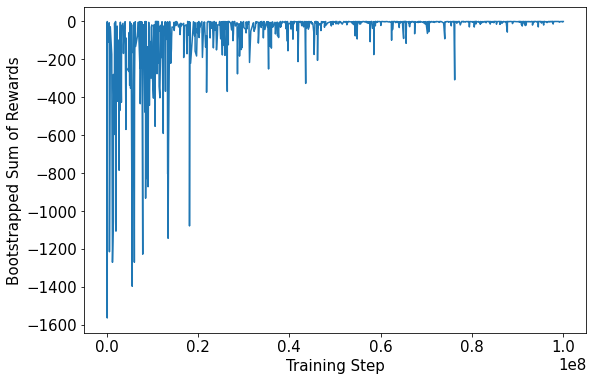

In [2]:
# Figure 4 (a)
training_log_plot('reward.csv', font_size=15, figsize=(9, 6), plot_type='reward')

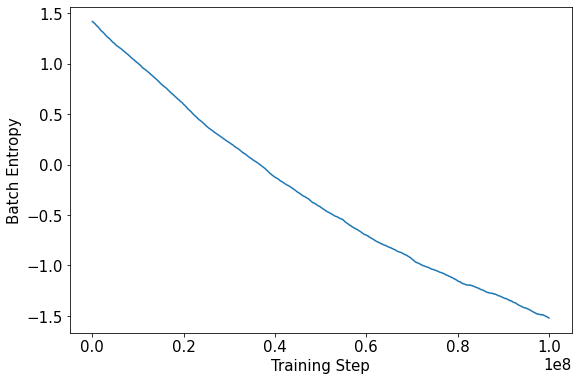

In [3]:
# Figure 4 (b)
training_log_plot('entropy.csv', font_size=15, figsize=(9, 6), plot_type='entropy')

#### Training Phase Figures and Tables

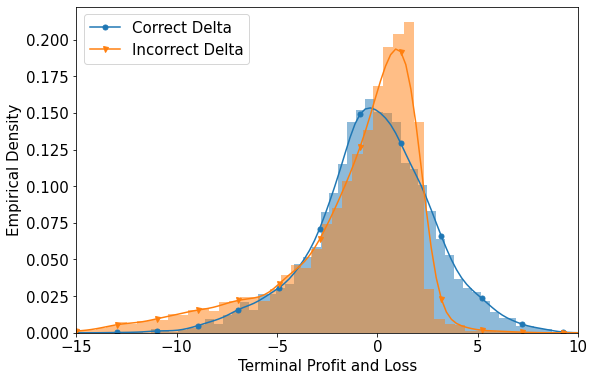

In [4]:
# Figure 1(a)
file_names = ['data_delta_bs_cfm_cd.pkl', 'data_delta_bs_cfm_id.pkl']
colors = ['tab:blue', 'tab:orange']
markers = ['o', 'v']
labels = ['Correct Delta', 'Incorrect Delta']
empirical_density_plot(file_names=file_names, font_size=15, figsize=(9,6), bin=50, alpha=0.5,
                       x_lim=[-15,10], x_num_grid=100, colors=colors, markers=markers, labels=labels)

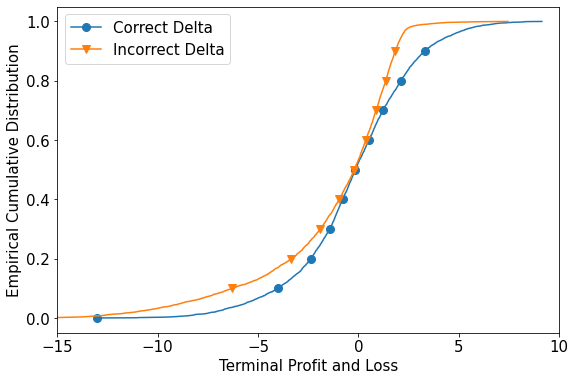

In [5]:
# Figure 1(b)
empirical_cdf_plot(file_names=file_names, font_size=15, figsize=(9,6), x_lim=[-15,10],
                   colors=colors, markers=markers, labels=labels)

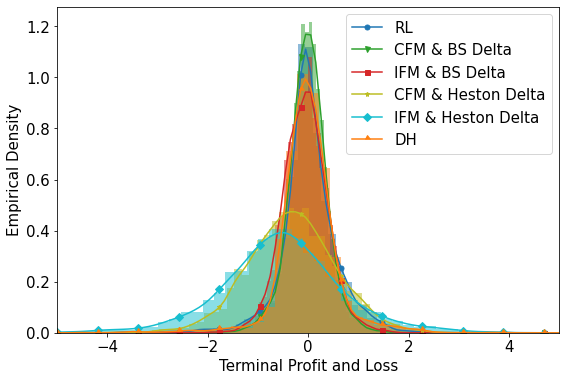

In [6]:
# Figure 5 (a)
file_names = ['data_rl.pkl', 'data_delta_bs_cfm.pkl', 'data_delta_bs_ifm.pkl',
              'data_delta_heston_cfm.pkl', 'data_delta_heston_ifm.pkl', 'data_dh.pkl']
colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:olive', 'tab:cyan', 'tab:orange']
markers = ['o', 'v', 's', '*', 'D', 10]
labels = ['RL', 'CFM & BS Delta', 'IFM & BS Delta', 'CFM & Heston Delta', 'IFM & Heston Delta', 'DH']
empirical_density_plot(file_names=file_names, font_size=15, figsize=(9,6), bin=50, alpha=0.5,
                       x_lim=[-5,5], x_num_grid=100, colors=colors, markers=markers, labels=labels)

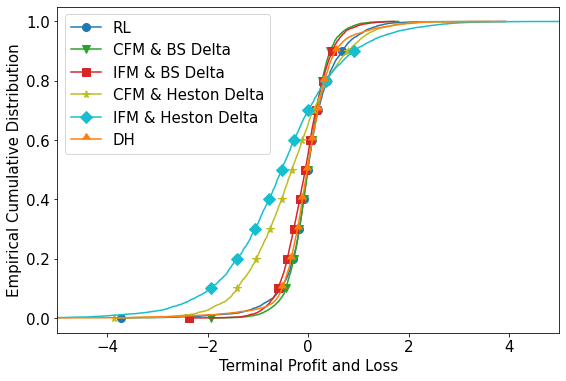

In [7]:
# Figure 5 (b)
empirical_cdf_plot(file_names=file_names, font_size=15, figsize=(9,6), x_lim=[-5,5],
                   colors=colors, markers=markers, labels=labels)

In [8]:
# Table 9
summary_stats(file_names, labels)

,Terminal P&L of Hedging Approach,Mean,Median,Std. Dev.,Var_90,Var_95,TVaR_90,TVaR_95,RMSE
0,RL,0.015337,-0.008786,0.575937,-0.536445,-0.874576,-1.054046,-1.434041,0.576141
1,CFM & BS Delta,-0.006555,-0.004400,0.381524,-0.441891,-0.627346,-0.700982,-0.885777,0.381580
2,IFM & BS Delta,-0.062607,-0.056496,0.445312,-0.604436,-0.770286,-0.847127,-1.017762,0.449691
3,CFM & Heston Delta,-0.321862,-0.325862,0.872044,-1.410248,-1.728686,-1.852745,-2.168690,0.929546
4,IFM & Heston Delta,-0.525875,-0.531252,1.203143,-1.941751,-2.479972,-2.704028,-3.226091,1.313049
5,DH,-0.006907,-0.018259,0.603341,-0.518143,-0.714845,-1.043464,-1.490729,0.603380


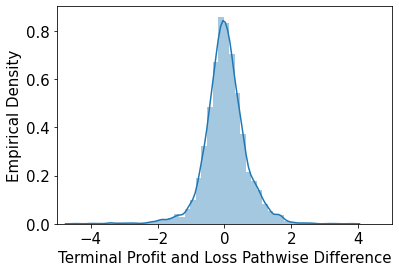

In [9]:
# Figure 6 (a)
pathwise_diff('data_rl.pkl', 'data_delta_bs_cfm.pkl', x_lim=[-5,5], font_size=15)

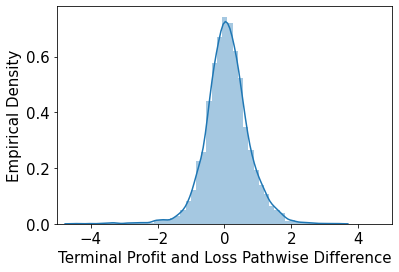

In [10]:
# Figure 6 (b)
pathwise_diff('data_rl.pkl', 'data_delta_bs_ifm.pkl', x_lim=[-5,5], font_size=15)

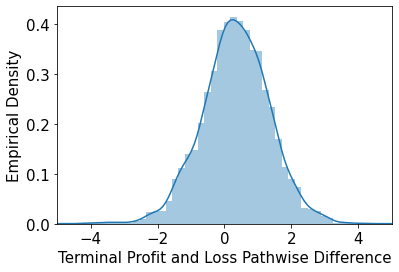

In [11]:
# Figure 6 (c)
pathwise_diff('data_rl.pkl', 'data_delta_heston_cfm.pkl', x_lim=[-5,5], font_size=15)

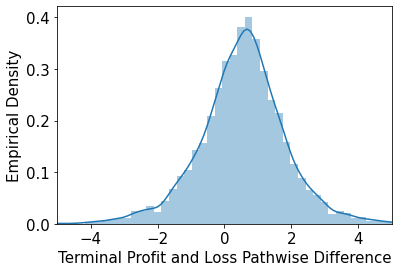

In [12]:
# Figure 6 (d)
pathwise_diff('data_rl.pkl', 'data_delta_heston_ifm.pkl', x_lim=[-5,5], font_size=15)

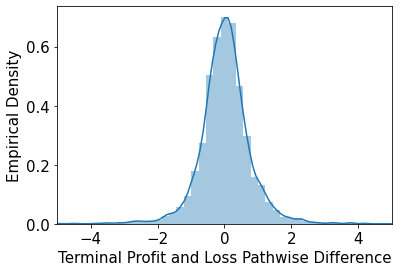

In [13]:
# Figure 6 (e)
pathwise_diff('data_rl.pkl', 'data_dh.pkl', x_lim=[-5,5], font_size=15)

In [14]:
# Table 10
pathwise_summary_stats(file_names[0], file_names[1:], labels[1:])

,Pathwise Difference of Terminal P&Ls Comparing With,Mean,Median,Std. Dev.,Probability of Non-Negativity
0,CFM & BS Delta,0.021892,0.007154,0.624076,0.5060
1,IFM & BS Delta,0.077944,0.067439,0.661555,0.5474
2,CFM & Heston Delta,0.337199,0.342621,1.014508,0.6434
3,IFM & Heston Delta,0.541212,0.584696,1.287142,0.7002
4,DH,0.022244,0.014183,0.751746,0.5128


#### Online Learning Phase Figures and Tables

In [15]:
df = OnlineLearning('./data_ol.pkl')

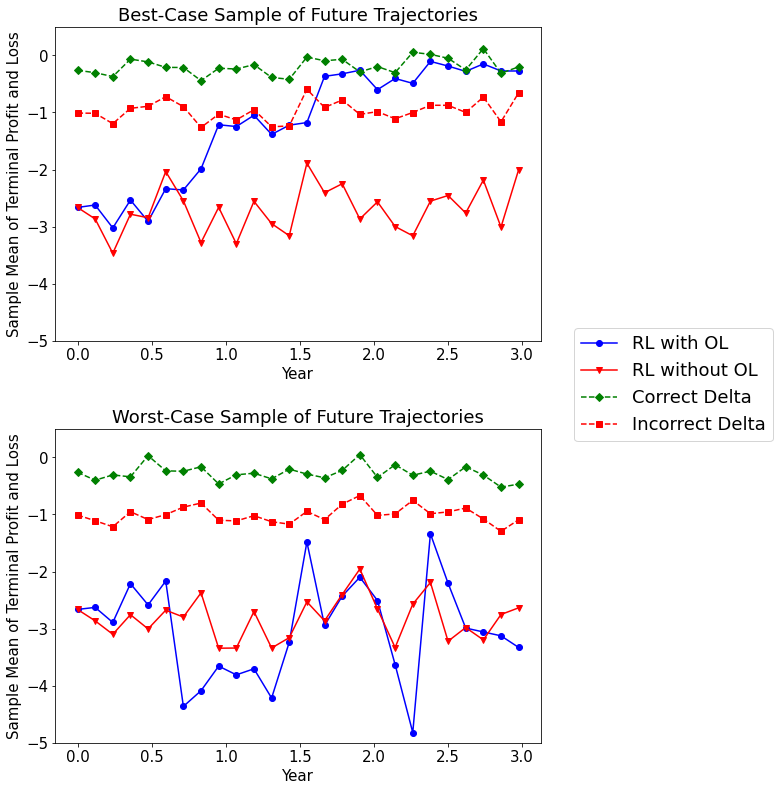

In [16]:
# Figure 8
labels = ['RL with OL', 'RL without OL', 'Correct Delta', 'Incorrect Delta']
markers = ['o', 'v', 'D', 's']
styles = ['b', 'r', 'g--', 'r--']
df.best_worst_traj(best_idx=14, worst_idx=12, labels=labels,
                   markers=markers, styles=styles, ylim=[-5, 0.5])

In [17]:
# probability for surpassing the correct Delta
df.catch_up_time_mean()
df.catch_up_time_mean_proba()

0.954

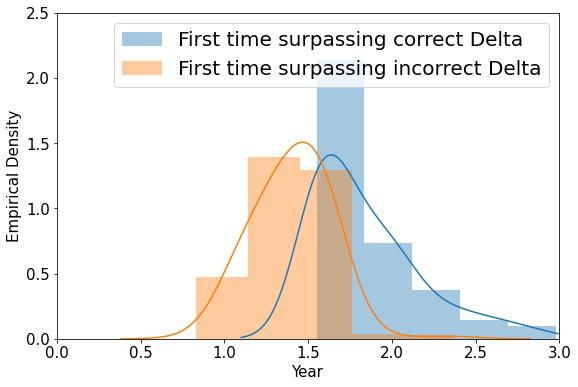

In [18]:
# Figure 9
df.catch_up_time_mean_plot(labels=["First time surpassing correct Delta",
                              "First time surpassing incorrect Delta"],
                      figsize=(9,6), font_size=20, bins=5, bwth=0.15, xlim=[0,3],
                      ylim=[0, 2.5])

In [19]:
# Table 12
df.catch_up_time_mean_stats()

,Reinforcement Learning Agentwith Online Learning PhaseFirst Surpassing Time to,Mean,Median,Std. Dev.,Var_90,Var_95,TVaR_90,TVaR_95
0,Correct Delta,1.840335,1.79,0.321949,2.38,2.50,2.659403,2.732174
1,Incorrect Delta,1.405231,1.43,0.219396,1.67,1.67,2.049474,2.049474


In [20]:
# calculate the p-values
df.p_val_traj()

100%|██████████| 1000/1000 [00:26<00:00, 37.19it/s]


In [21]:
# Table 13
df.catch_up_prob_p_table([0.2, 0.15, 0.1, 0.05, 0.01])

,Estimated Proportion of Exceeding,a* = 0.2,a* = 0.15,a* = 0.1,a* = 0.05,a* = 0.01
0,Correct Delta,0.557,0.521,0.476,0.359,0.218
1,Incorrect Delta,0.969,0.951,0.850,0.706,0.646


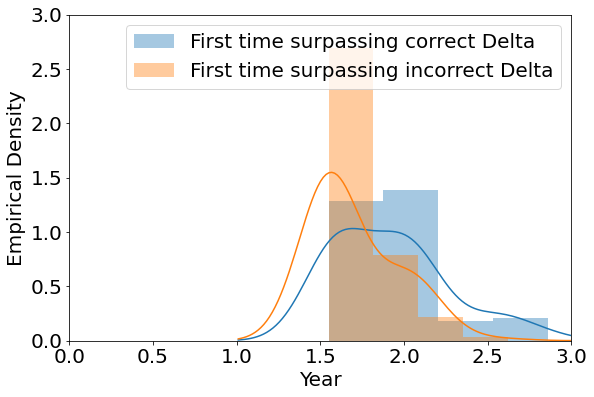

In [22]:
# Figure 10
df.catch_up_time_p_plot(crit_lvl=0.1, labels=["First time surpassing correct Delta",
                              "First time surpassing incorrect Delta"],
                      figsize=(9,6), font_size=20, bins=4, bwth=0.18, xlim=[0,3],
                      ylim=[0, 3])

In [23]:
# Table 14
df.catch_up_time_p_stats(crit_lvl=0.1)

,Reinforcement Learning Agentwith Online Learning PhaseFirst Surpassing Time to,Mean,Median,Std. Dev.,Var_90,Var_95,TVaR_90,TVaR_95
0,Correct Delta,1.915798,1.90,0.337488,2.50,2.62,2.606000,2.698750
1,Incorrect Delta,1.704517,1.55,0.235121,2.02,2.14,2.066512,2.201818


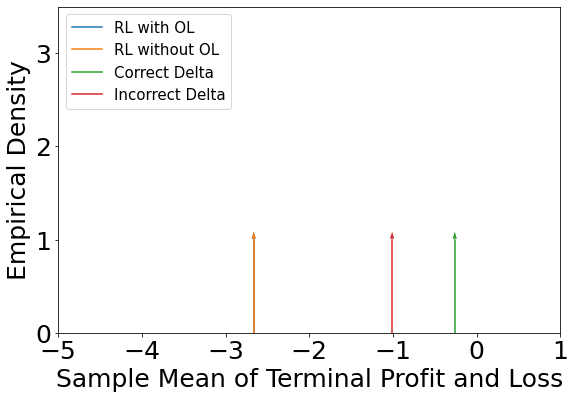

In [24]:
labels = ['RL with OL', 'RL without OL', 'Correct Delta', 'Incorrect Delta']
# Figure 11 (a)
df.snapshots_plot(t_idx=0, figsize=(9,6), labels=labels, x_lim=[-5, 1], y_lim=[0, 3.5])

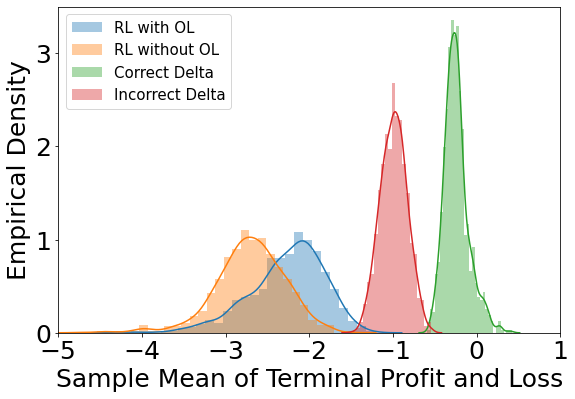

In [25]:
# Figure 11 (b)
df.snapshots_plot(t_idx=5, figsize=(9,6), labels=labels, x_lim=[-5, 1], y_lim=[0, 3.5])

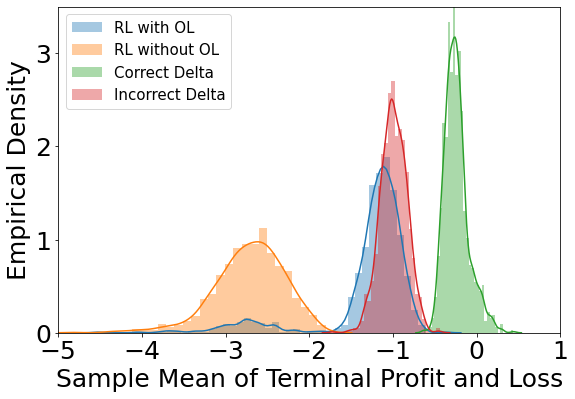

In [26]:
# Figure 11 (c)
df.snapshots_plot(t_idx=10, figsize=(9,6), labels=labels, x_lim=[-5, 1], y_lim=[0, 3.5])

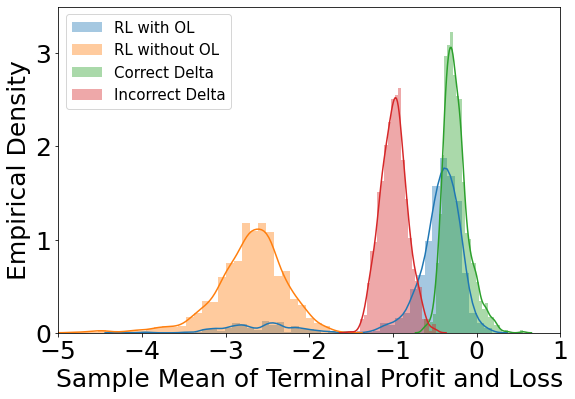

In [27]:
# Figure 11 (d)
df.snapshots_plot(t_idx=15, figsize=(9,6), labels=labels, x_lim=[-5, 1], y_lim=[0, 3.5])

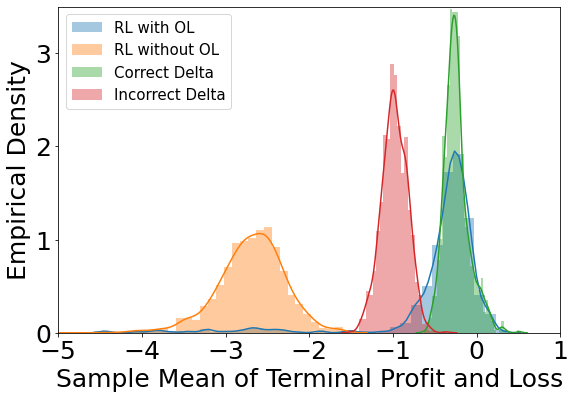

In [28]:
# Figure 11 (e)
df.snapshots_plot(t_idx=20, figsize=(9,6), labels=labels, x_lim=[-5, 1], y_lim=[0, 3.5])

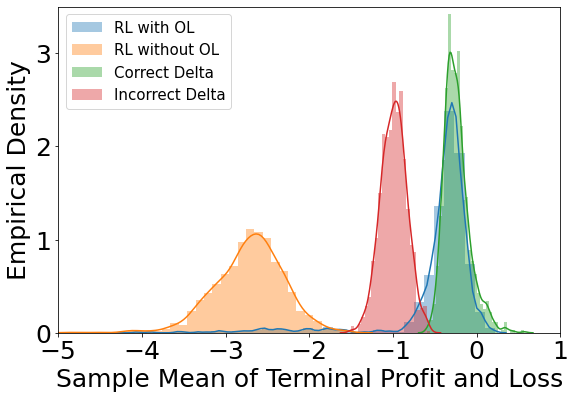

In [29]:
# Figure 11 (f)
df.snapshots_plot(t_idx=25, figsize=(9,6), labels=labels, x_lim=[-5, 1], y_lim=[0, 3.5])

In [30]:
# Table 15 (a)
df.snapshots_stats(t_idx=0)

,Sample Mean of Terminal P&L by,Mean,Median,Std. Dev.,Var_90,Var_95,TVaR_90,TVaR_95
0,RL with OL,-2.664135,-2.664135,8.881784e-16,-2.664135,-2.664135,-2.664135,-2.664135
1,RL without OL,-2.664135,-2.664135,8.881784e-16,-2.664135,-2.664135,-2.664135,-2.664135
2,Correct Delta,-0.261726,-0.261726,0.000000e+00,-0.261726,-0.261726,-0.261726,-0.261726
3,Incorrect Delta,-1.010901,-1.010901,2.220446e-16,-1.010901,-1.010901,-1.010901,-1.010901


In [31]:
# Table 15 (b)
df.snapshots_stats(t_idx=5)

,Sample Mean of Terminal P&L by,Mean,Median,Std. Dev.,Var_90,Var_95,TVaR_90,TVaR_95
0,RL with OL,-2.265307,-2.194503,0.447701,-2.860126,-3.112703,-3.169612,-3.382565
1,RL without OL,-2.705482,-2.689699,0.419971,-3.196802,-3.388247,-3.516121,-3.757731
2,Correct Delta,-0.241841,-0.259837,0.146063,-0.403583,-0.451525,-0.457174,-0.490560
3,Incorrect Delta,-0.992077,-0.988378,0.158552,-1.200097,-1.261323,-1.268493,-1.312655


In [32]:
# Table 15 (c)
df.snapshots_stats(t_idx=10)

,Sample Mean of Terminal P&L by,Mean,Median,Std. Dev.,Var_90,Var_95,TVaR_90,TVaR_95
0,RL with OL,-1.289873,-1.142783,0.551277,-1.828672,-2.749556,-2.798058,-3.104551
1,RL without OL,-2.712074,-2.683780,0.419998,-3.220234,-3.445152,-3.540591,-3.777408
2,Correct Delta,-0.243880,-0.260255,0.143998,-0.407194,-0.440201,-0.450323,-0.478707
3,Incorrect Delta,-0.994283,-0.994992,0.156630,-1.185999,-1.253414,-1.274822,-1.334032


In [33]:
# Table 15 (d)
df.snapshots_stats(t_idx=15)

,Sample Mean of Terminal P&L by,Mean,Median,Std. Dev.,Var_90,Var_95,TVaR_90,TVaR_95
0,RL with OL,-0.627974,-0.427110,0.685502,-1.135054,-2.495628,-2.521441,-2.939436
1,RL without OL,-2.710448,-2.672721,0.426261,-3.219370,-3.421523,-3.584942,-3.857181
2,Correct Delta,-0.249042,-0.274251,0.150951,-0.408961,-0.445990,-0.465355,-0.501583
3,Incorrect Delta,-0.992219,-0.987962,0.158744,-1.196884,-1.258612,-1.266760,-1.306337


In [34]:
# Table 15 (e)
df.snapshots_stats(t_idx=20)

,Sample Mean of Terminal P&L by,Mean,Median,Std. Dev.,Var_90,Var_95,TVaR_90,TVaR_95
0,RL with OL,-0.455733,-0.288183,0.714748,-0.720393,-2.239805,-2.129206,-3.244071
1,RL without OL,-2.694052,-2.662659,0.406222,-3.181056,-3.400972,-3.483185,-3.692711
2,Correct Delta,-0.241928,-0.260775,0.149342,-0.404680,-0.448640,-0.461255,-0.497762
3,Incorrect Delta,-0.982509,-0.984672,0.154457,-1.176059,-1.242116,-1.259364,-1.312079


In [35]:
# Table 15 (f)
df.snapshots_stats(t_idx=25)

,Sample Mean of Terminal P&L by,Mean,Median,Std. Dev.,Var_90,Var_95,TVaR_90,TVaR_95
0,RL with OL,-0.451566,-0.325699,0.563186,-0.658369,-1.662404,-1.752376,-2.594932
1,RL without OL,-2.713515,-2.679327,0.412271,-3.239449,-3.381767,-3.494107,-3.677203
2,Correct Delta,-0.240117,-0.263731,0.154601,-0.409073,-0.443493,-0.455738,-0.487881
3,Incorrect Delta,-0.991191,-0.988468,0.154215,-1.187053,-1.243113,-1.264880,-1.314445
